In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

from sklearn.datasets import make_blobs

In [ ]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow", "green" ])

In [ ]:
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


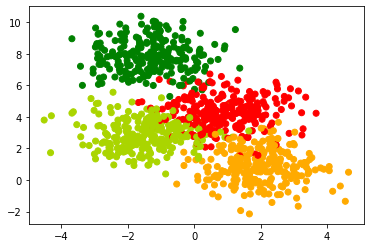

In [ ]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [ ]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

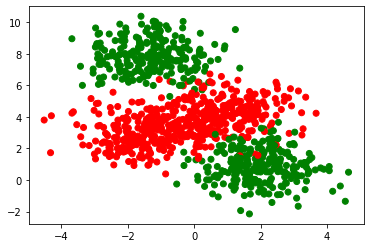

In [ ]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [ ]:
class LogisticRession:
  def __init__(self):
    self.w = None
    self.b = None

  def perceptron(self,x):
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)*y_pred*(1-y_pred)*x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)*y_pred*(1-y_pred)

  def fit(self, X, Y, epochs=10, learning_rate=0.5):
    self.w = np.random.randn(1, X.shape[1])
    self.b = 0
    loss = []
    for i in  tqdm_notebook(range(epochs), total=epochs):
      dw = 0
      db = 0
      for x, y in zip(X,Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x,y)

      self.w -= learning_rate*dw
      self.b -= learning_rate*db

      Y_pred = self.sigmoid(self.perceptron(X))
      loss.append(mean_squared_error(Y_pred, Y))


    plt.plot(loss)
    plt.xlabel('Epochs')
    plt.ylabel("MSE")
    plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels,random_state=0)
print(X_train.shape)
print(X_test.shape)

(750, 2)
(250, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1000 [00:00<?, ?it/s]

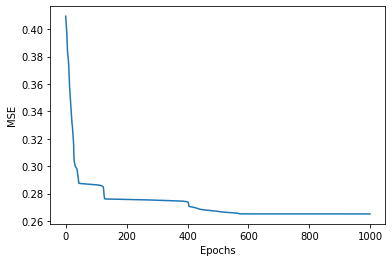

In [ ]:
logRes = LogisticRession()
logRes.fit(X_train, Y_train, epochs=1000)

array([[ 21.92170372, -27.53697314]])

In [ ]:
Y_pred_train = logRes.predict(X_train)
y_pred_bin_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_test = logRes.predict(X_test)
y_pred_bin_test = (Y_pred_test >= 0.5).astype("int").ravel()

accuray_train = accuracy_score(y_pred_bin_train, Y_train)
accuray_test = accuracy_score(y_pred_bin_test, Y_test)

In [ ]:
print("Train accuray: ", accuray_train)
print("Test Acccuray:", accuray_test)

Train accuray:  0.7333333333333333
Test Acccuray: 0.712


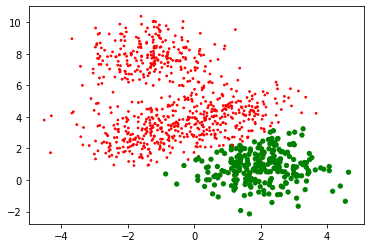

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_bin_train, cmap=my_cmap,  s= 15*(np.abs(y_pred_bin_train) + .2))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_bin_test, cmap=my_cmap,  s= 15*(np.abs(y_pred_bin_test) + .2))

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

sklean_logres = LogisticRegression()

sklean_logres.fit(x, y)